<a href="https://colab.research.google.com/github/Piyush-Mudgal/Machine-Learning/blob/main/DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

################################

<h1>Neural Networks

################################

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

Reading the dataset

In [3]:
df=pd.read_csv("adult.csv",na_values=['?'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Getting Dataset information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Checking for Null Values

In [5]:
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Find the Mode to replace Null values in catagorical varaiables in the dataset

In [6]:
print(df["workclass"].mode())
print(df["occupation"].mode())
print(df["native_country"].mode())

0    Private
dtype: object
0    Prof-specialty
dtype: object
0    United-States
dtype: object


Replacing the Null values

In [7]:
df["workclass"]=df["workclass"].fillna(df["workclass"].mode()[0])
df["occupation"]=df["occupation"].fillna(df["occupation"].mode()[0])
df["native_country"]=df["native_country"].fillna(df["native_country"].mode()[0])
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


As we can see all the NULL values from the dataset have been removed


Now encoding the catagorical data values

In [8]:
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["income"]=le.fit_transform(df["income"])

df=pd.get_dummies(df,columns=["workclass","education","marital_status","occupation","relationship","race","native_country"])
df.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,90,77053,9,0,0,4356,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,0,4356,18,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,0,4356,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Splitting into X and y and test,train sets


In [9]:
X=df.drop(["income"],axis=1)
y=df["income"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
mlp=MLPClassifier(hidden_layer_sizes=100,activation="relu",alpha=0.0001,batch_size="auto",max_iter=200,random_state=None)
mlp.fit(X_train,y_train)

y_pred2=mlp.predict(X_test)
print("MLP Accuracy:",metrics.accuracy_score(y_test,y_pred2))

MLP Accuracy: 0.7889447236180904


Changing the Hyper Parameters and checking the accuracy

In [11]:
mlp=MLPClassifier(hidden_layer_sizes=100,activation="relu",alpha=0.01,solver="sgd",batch_size="auto",max_iter=200,random_state=None)
mlp.fit(X_train,y_train)

y_pred2=mlp.predict(X_test)
print("MLP Accuracy:",metrics.accuracy_score(y_test,y_pred2))

MLP Accuracy: 0.7594453750232645


################################

<h1>Decision Trees</h1>

################################

In [12]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys

Encoding the data

In [13]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(list(df.drop('income',axis=1).columns))
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)
encoder = ce.OrdinalEncoder('income')
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=15,random_state=0).fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8439419318816304

In [15]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train))) 
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9055
Test set score: 0.8439


[Text(0.5335912403629939, 0.96875, 'X[33] <= 0.5\ngini = 0.365\nsamples = 21815\nvalue = [16570, 5245]'),
 Text(0.27473598618695794, 0.90625, 'X[4] <= 7073.5\ngini = 0.118\nsamples = 11729\nvalue = [10992, 737]'),
 Text(0.18352272727272728, 0.84375, 'X[2] <= 12.5\ngini = 0.09\nsamples = 11527\nvalue = [10984, 543]'),
 Text(0.11622229360745262, 0.78125, 'X[5] <= 2218.5\ngini = 0.045\nsamples = 9249\nvalue = [9034, 215]'),
 Text(0.08030838419530999, 0.71875, 'X[6] <= 43.5\ngini = 0.042\nsamples = 9210\nvalue = [9013, 197]'),
 Text(0.04929328621908127, 0.65625, 'X[32] <= 0.5\ngini = 0.026\nsamples = 7678\nvalue = [7577, 101]'),
 Text(0.03793768069386444, 0.59375, 'X[0] <= 32.5\ngini = 0.025\nsamples = 7669\nvalue = [7572, 97]'),
 Text(0.022775457757789913, 0.53125, 'X[1] <= 23840.0\ngini = 0.006\nsamples = 4339\nvalue = [4327, 12]'),
 Text(0.019402505621586894, 0.46875, 'X[1] <= 23381.0\ngini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(0.018374558303886925, 0.40625, 'gini = 0.0\nsample

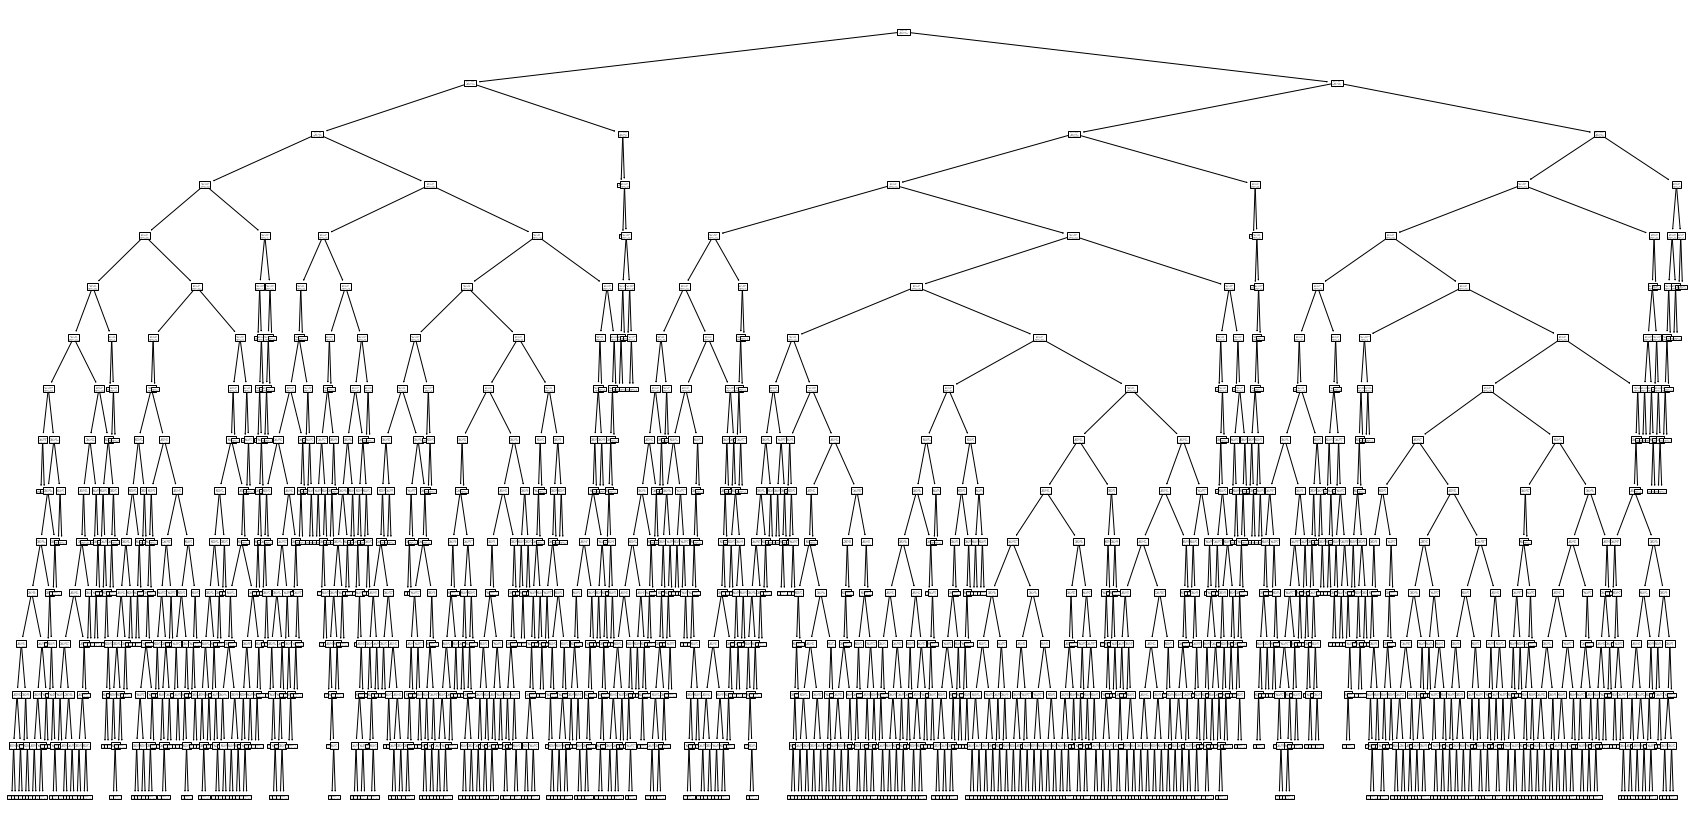

In [16]:
plt.figure(figsize=(30,15))
from sklearn import tree
tree.plot_tree(clf.fit(X_train,y_train))

################################

<h1>Support Vector Machines</h1>

################################

In [17]:
from sklearn.svm import SVC 

In [18]:
clf1 = SVC(kernel='rbf').fit(X_train, y_train)
y_pred=clf1.predict(X_test)
print(clf1.score(X_test, y_test))

0.791643402196166


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['<=50k','>50k']))

              precision    recall  f1-score   support

       <=50k       0.78      1.00      0.88      8150
        >50k       0.99      0.14      0.24      2596

    accuracy                           0.79     10746
   macro avg       0.89      0.57      0.56     10746
weighted avg       0.83      0.79      0.73     10746

